In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",120)
pd.set_option("display.max_rows",120)

In [3]:
df= pd.read_csv(r"../data/train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## missing value imputation

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### missing value imputation with the help of catagorical reference
 *** Item_weights can be determined by Item_Identifier ?
 

In [5]:
len(df["Item_Identifier"].unique())

1559

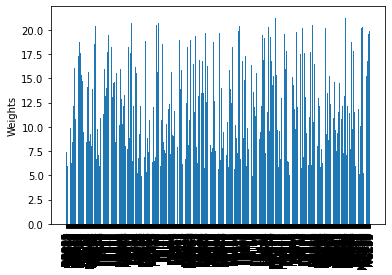

In [6]:
result= df.groupby("Item_Identifier").mean()
outlet_size= [item for item,data in df.groupby("Item_Identifier")]

plt.bar(outlet_size,result["Item_Weight"])
plt.xticks(rotation="vertical")
plt.ylabel("Weights")
plt.show()

In [7]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# there is 4 null value left in item weight
df[df.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [9]:
# grouping based on item type and calculating mean of item weight
Item_Type_Means = df.groupby('Item_Type')['Item_Weight'].mean() 
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [10]:
# grouping based on item type and calculating mean of item weight
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### outlet size

In [11]:
crosstab= pd.crosstab(df["Outlet_Size"],df['Outlet_Type'])
crosstab

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


#### From the above table it is evident that all the grocery stores are of small types, which is mostly true in the real world.

In [12]:
dic = {'Grocery Store':'Small'}
s = df.Outlet_Type.map(dic)
s

0         NaN
1         NaN
2         NaN
3       Small
4         NaN
        ...  
8518      NaN
8519      NaN
8520      NaN
8521      NaN
8522      NaN
Name: Outlet_Type, Length: 8523, dtype: object

In [13]:
df.Outlet_Size= df.Outlet_Size.combine_first(s)
df.Outlet_Size.value_counts()


Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

#### In real world it is mostly seen that outlet size varies with the location of the outlet, hence checking between the same

In [14]:
crosstab= pd.crosstab(df["Outlet_Size"],df['Outlet_Location_Type'])
crosstab

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


From the above table it is evident that all the Tier 2 stores are of small types. Therefore mapping Tier 2 store and small size

In [15]:
dic= {"Tier 2": "Small"}
s= df.Outlet_Location_Type.map(dic)
df["Outlet_Size"]= df["Outlet_Size"].combine_first(s)

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### missing value handled 

# Data cleaning

### Item_Fat_Content

In [17]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* we saw that before some of datapoints are mislabled as LF,reg and low fat

In [18]:
df["Item_Fat_Content"]= df["Item_Fat_Content"].map(
    {"low fat":"Low Fat",
     "reg":"Regular Fat",
     "LF":"Low Fat",
     "Regular":"Regular Fat",
     "Low Fat":"Low Fat"})

In [19]:
df["Item_Fat_Content"].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

### Item Visibility

In [20]:
#here we found that in Item_visibility has some 0 value, which makes no sense so lets replace it with mean value

visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(
    lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0)) 

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [21]:
# sns.histplot(np.log(df["Item_Visibility"]))
# plt.show()

In [ ]:
#

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## feature engineering

#### year

In [22]:
df['Outlet_Years'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
#df.drop(columns=['Outlet_Establishment_Year'],inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular Fat,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


### feature encoding

In [23]:
var_cat = df.select_dtypes(include=[object])
#var_cat.head()

In [24]:
#Convert categorical into numerical 
var_cat = var_cat.columns.tolist()


In [25]:
def get_first_two_char(obj):
    first_two= obj[:2]
    if first_two== "FD":
        return "Food"
    elif first_two =="DR":
        return "Drinks"
    else:
        return "Non-Consumable"

df["Item_Type_New"]= df["Item_Identifier"].apply(get_first_two_char)

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular Fat,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


### I noticed that Item Type that is non consumable have low fat
.. how can something have Fat if it is non consumable ..  adding "No Fat" term for that

In [32]:
# position that to be replaced
to_replaced= df["Item_Type_New"]=="Non-Consumable"

df.loc[to_replaced,"Item_Fat_Content"] = "No Fat"

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular Fat,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,No Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


## Label Encoding features using Label Encoder

### features that to be label encoded
1. Item_Fat_Content 
2. Outlet_Size
3. Outlet_Location_Type
4. Outlet_Type
5. Item_Type
6. Item_Type_New

In [33]:
from sklearn.preprocessing import LabelEncoder
import pickle
import os

labels= ["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type","Item_Type_New"]

for label in labels:
    try:
        if not os.path.isdir("./Label_encoder"):
            os.mkdir("./Label_encoder")
        le= LabelEncoder()
        df[label]=le.fit_transform(df[label])
        filename= "./Label_encoder"+"/le_"+label +".sav"
        pickle.dump(le, open(filename, 'wb'))
    except Exception as e:
        raise e
        
        
        

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,23,1
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,13,0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,23,1
3,FDX07,19.20,2,0.015274,6,182.0950,OUT010,1998,2,2,0,732.3800,24,1
4,NCD19,8.93,1,0.008082,9,53.8614,OUT013,1987,0,2,1,994.7052,35,2


In [35]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New
Item_Weight,1.000000,-0.004071,-0.017912,0.035710,0.025967,-0.013417,-0.012445,0.002973,0.000592,0.013198,0.013417,0.071585
Item_Fat_Content,-0.004071,1.000000,0.023999,-0.066248,0.008594,0.001451,-0.000829,0.000958,0.000084,0.015249,-0.001451,0.186485
Item_Visibility,-0.017912,0.023999,1.000000,-0.040646,-0.004525,-0.075175,0.092897,-0.030674,-0.174403,-0.128449,0.075175,-0.048244
Item_Type,0.035710,-0.066248,-0.040646,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048,-0.004970,0.007456
Item_MRP,0.025967,0.008594,-0.004525,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574,-0.005020,0.032517
Outlet_Establishment_Year,-0.013417,0.001451,-0.075175,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135,-1.000000,-0.008551
Outlet_Size,-0.012445,-0.000829,0.092897,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753,-0.425534,-0.001276
Outlet_Location_Type,0.002973,0.000958,-0.030674,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367,0.089216,0.007661
Outlet_Type,0.000592,0.000084,-0.174403,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522,0.122304,0.001136
Item_Outlet_Sales,0.013198,0.015249,-0.128449,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,0.049135,0.011236


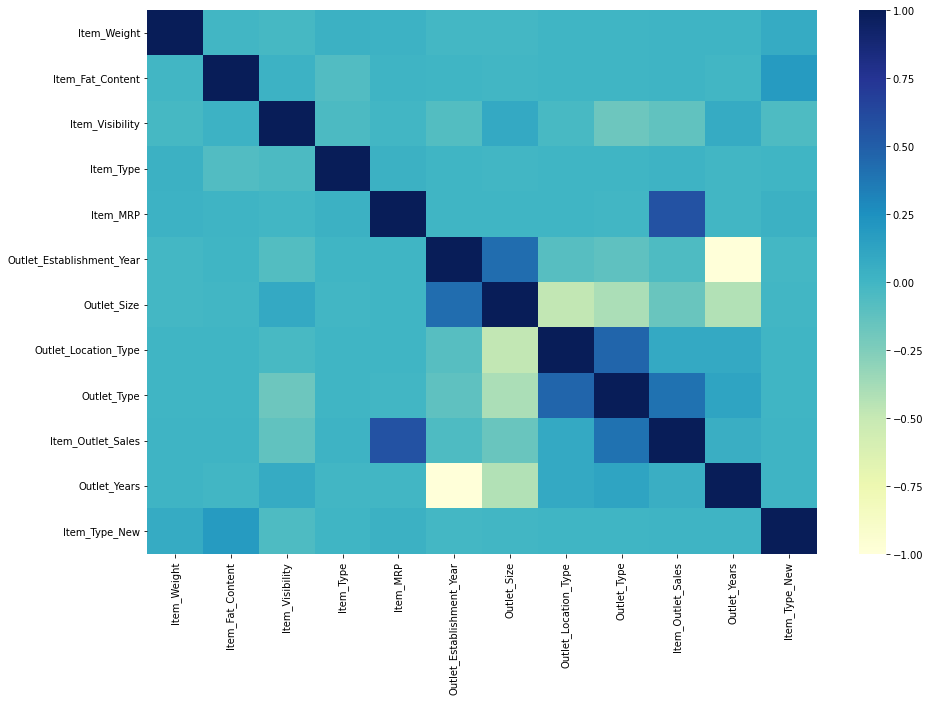

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap= "YlGnBu")
plt.show()

### features that need to be dropped
.  Item_Identifier

.  Outlet_Identifier

.  Oultlet_Establishment_Year

.  Item_type_New

In [37]:
df.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year","Item_type_New"],axis=1,inplace= True)

In [38]:
df.to_csv("cleaned_data.csv",index=False)